<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/AI%20Engineering/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **RETRIEVAL AUGMENTED GENERATION**


Retrieval Augmented Generation (RAG) is a process of optimizing the output of a Large Language Model, so it referances an authoritative knowledge base outside of its training data sources before generating a response.

LLMs are trained on vast volumes of data and use billions of parameters to generate original output for tasks like answering questions, translating languages, completing sentences, code writing and documenting etc.

RAG extends the already powerful capabilities of LLMs to specific domains or an organization's internal knowledge base, all without the need to retrain the model (finetuning or retraining entire models with new data in a highly expensive task).

It is a cost effective approach to improving LLM output so it remains relevant, accurate and useful in various contexts.

### Limitations of Large Language Models
1. Although LLMs perform a vast array of generation and understanding tasks, it does not do well on data which it was not trained upon. When such questions are asked, the LLM generates answers which looks convincing but are factually incorrect. This is called as **LLM Hallucination**

2. An LLM is trained on general data and does not have any knowledge about a user or organization's internal data and thus cannot generate content based on them by itself.

**These two disadvantages can be solved with the help of RAG**



## **RAG** **Pipeline:**

The RAG pipeline consists of the following components:
1. **Vector store / vector Database** : stores the data in vector format
2. **Base model**: model which is used for content generation
3. **Embedding model**: model which converts the test data into vector embeddings(to store in the vector store)
4. **chunking**: retrieve the data from the vector store in the form of chunks (only the data which the user needs in retrieved)
4. **user prompt**: The prompt given by the user is passed along with the relevent chunks to the base model.

### **The RAG system consists of three main pipelines:**
1. **Data Ingestion**:
The user data is effectively parsed and sent to an embedding model. This embedding model converts this text into vector embeddings. These vector embeddings are then stored in a vector database.

2. **Retrieval**:
When a user prompt is passed. The chunks of data relevant to the query are first retrieved from the vector database(called as **context**).

3. **Augmentation**:
The user prompt is then augmented by appending it with these retrieved chunks. This new modified prompt is then passed to the base model.

4. **Generation**:
The base model uses this prompt(consisting of the user prompt plus the relevant user specific content from the vector database) and then generates the output.

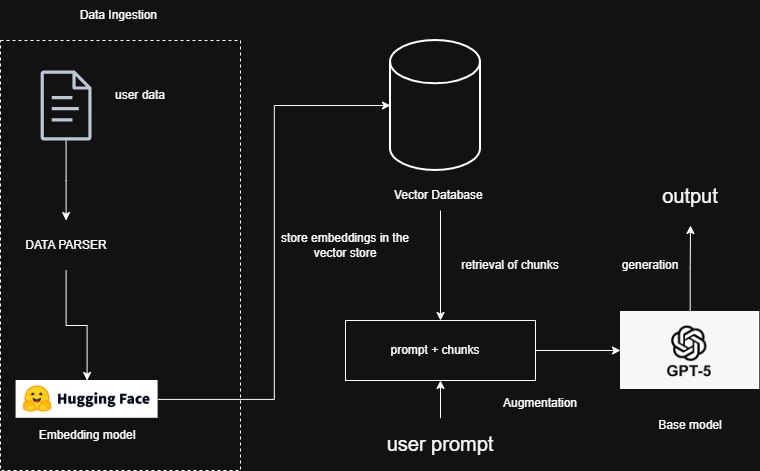

## Implementing RAG using Langchain

Langchain is an open source framework introduced by Harrisson Chase in 2022. It is the most effective framework to interact with various open and commersial large language models from google, OpenAI, meta, groq etc.

Langchain provides various tools to implement complex AI Engineering applications like RAG, Agents, tools, protocols etc.

## **Data Ingestion**

In [ ]:
!pip install langchain langchain-core langchain-community pypdf pymupdf

The typical Data ingestion process looks like the following:


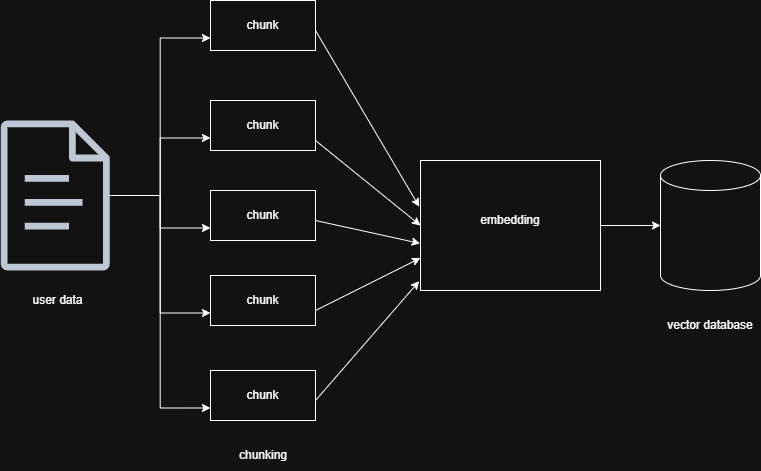

## Langchain Document Data Structure

The Langchain Document data structure is a way of representing external documents in an efficient way.

`` from langchain.schema import Document``
<br>
` from langchain_core.documents import Document`

The core components of a Langchain Document are:
1. **page_content(str):** contains all the content present in the user document
2. **metadata(dict)**: contains the metadata (additional information of the file).

**Langchain Document loaders:**

The document loaders convert the user file into a langchain Document.

Various Langchain document loaders include:

1. **pdf loader**:
used to load pdf files

`from langchain.document_loaders import PyPDFLoader`
<br>
` loader = PyPDFLoader('file.pdf')`
<br>
` documents = loader.load()`

2. **CSV Loader**: used to load a csv file

`from lanchain.document_loaders import CSVLoader`
<br>
` loader = CSVLoader('data.csv')`
<br>
` document = loader.load()`

3. **Webbase loader**: used to load data from web pages

` from langchain.document_loaders import WebBaseLoader`
<br>
` loader = WebBaseLoader('http://webpage.com')`
<br>
` document = loader.load()`

4. **Directory Loader**: used to load directory

` from langchain.document_loaders import DirectoryLoader`
<br>
` loader = DirectoryLoader('/docs')`
<br>
` document = loader.load()`

There are various other kinds of document loaders available in Langchain.




In [ ]:
from langchain_core.documents import Document

In [ ]:
doc = Document(
    page_content="""I promised the people of the Philippines whenst i came, i shall return. Tonight, i repeat those words,
    i shall return
    - Douglas MacAurthur
     """,
    metadata={
        "source": "worldwar.text",
        "pages": 1,
        "author": 'Aditya',
        "date_created": "22-11-2025"
    }
)

In [ ]:
doc

In [ ]:
# # Loading a text file using TextLoader

from langchain.document_loaders import TextLoader
#from langchain_community.document_loaders import TextLoader
loader = TextLoader('france.txt')
loader

In [ ]:
document = loader.load()

In [ ]:
document

In [ ]:
# Task 1 : load the given directory into a langchain document using an approporiate loader
# load the csv file into a langchain document

# Task 2: explore the paramters of various loader classes.
#https://docs.langchain.com/oss/python/integrations/document_loaders

## Langchain Text Splitter

The langchain text splitter is used to split the text from the document into chunks.

Text splitting is the process of breaking large text (pdfs, html pages, text files etc) into small managable components (chunks) for the LLM to process easily

Text splitters in Langchain are of different types:
1. **Length based Text splitters**:
The splitting is done based on the length of the input document. In this type of chunking, the chunk size is pre determined

It is the most simple form of splitting

**Limitation**: It only considers the count of characters, does not consider the grammer or symantic meaning of the tokens.

` from langchain.text_splitter import CharacterTextSplitter`

2. **Text structure based Text Splitters**:
The splitting is done based on a text structure

It assumes that the given text always follows a defined structure.
It follows a paragraph, line, word, character type text splitting format

` from langchain.text_splitter import RecursiveCharacterTextSplitter`

3. **Document based Text Splitter**:
Certain type of documents are not mere text files but has different kinds of specific structure. ex: code files

These files have to be chunked based on certain file specific or language specific keywords and not ordinary chunking mechanisms.

`RecursiveCharacterTextSplitter` can also be used for this task provided, we change the configuration to suit the custom document

4. **Semantic Meaning based Text Splitter**:
Most times, a single file or document might consists of data with different topics. It is important that we ensure that a chunk contains data belonging to only one topic.

This approach however is still yet to be fully explored and the langchain main library does not provide functionality to deal with it. Therefore, it is not covered in this notebook.

(You can go to `langchain_experimental` and import the `SemanticChunker` module)

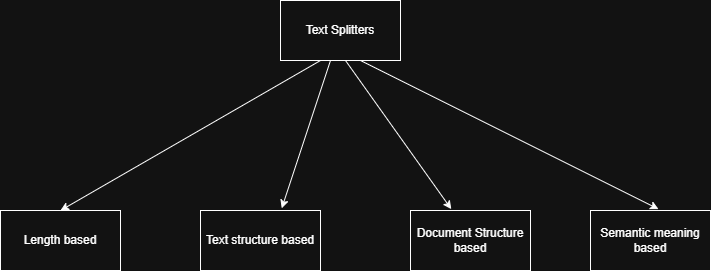

In [ ]:
# text splitting on the basis of length

from langchain.text_splitter import CharacterTextSplitter

text = """
Yesterday, December 7, 1941—a date which will live in infamy—the United States of America was suddenly and deliberately attacked by naval and air forces of the Empire of Japan.

The United States was at peace with that nation, and, at the solicitation of Japan, was still in conversation with its government and its emperor looking toward the maintenance of peace in the Pacific. Indeed, one hour after Japanese air squadrons had commenced bombing in the American island of Oahu, the Japanese ambassador to the United States and his colleague delivered to our Secretary of State a formal reply to a recent American message. While this reply stated that it seemed useless to continue the existing diplomatic negotiations, it contained no threat or hint of war or of armed attack.

It will be recorded that the distance of Hawaii from Japan makes it obvious that the attack was deliberately planned many days or even weeks ago. During the intervening time, the Japanese government has deliberately sought to deceive the United States by false statements and expressions of hope for continued peace.

The attack yesterday on the Hawaiian Islands has caused severe damage to American naval and military forces. I regret to tell you that very many American lives have been lost. In addition, American ships have been reported torpedoed on the high seas between San Francisco and Honolulu.

Yesterday, the Japanese government also launched an attack against Malaya.
Last night, Japanese forces attacked Hong Kong.
Last night, Japanese forces attacked Guam.
Last night, Japanese forces attacked the Philippine Islands.
Last night, the Japanese attacked Wake Island.
And this morning, the Japanese attacked Midway Island.

Japan has, therefore, undertaken a surprise offensive extending throughout the Pacific area. The facts of yesterday and today speak for themselves.

The people of the United States have already formed their opinions and well understand the implications to the very life and safety of our nation.

As Commander-in-Chief of the Army and Navy, I have directed that all measures be taken for our defense. But always will our whole nation remember the character of the onslaught against us.

No matter how long it may take us to overcome this premeditated invasion, the American people, in their righteous might, will win through to absolute victory.

I believe I interpret the will of the Congress and of the people when I assert that we will not only defend ourselves to the uttermost, but will make very certain that this form of treachery shall never again endanger us.

Hostilities exist. There is no blinking at the fact that our people, our territory, and our interests are in grave danger.

With confidence in our armed forces—with the unbounding determination of our people—we will gain the inevitable triumph—so help us God.

I ask that the Congress declare that since the unprovoked and dastardly attack by Japan on Sunday, December 7, 1941, a state of war has existed between the United States and the Japanese Empire.
"""

splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=10, separator='')
chunks = splitter.split_text(text)

In [ ]:
chunks[0]

In [ ]:
chunks[1]

In [ ]:
len(chunks)

In [ ]:
# splitting a document using CHaracterSplitter

from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader

loader = TextLoader('france.txt')
document = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(document)




In [ ]:
texts[0]

In [ ]:
len(texts)

In [ ]:
# Text structure based splitting
from langchain.text_splitter import RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=10)

text = splitter.split_documents(document)


In [ ]:
len(text)

In [ ]:
# Document based chunking:

# here we try to chunk a code written in the JAVA programing language

from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JAVA,
    chunk_size=100,
    chunk_overlap=20,
)

code = """
public class MainApp {

    public static void main(String[] args) {
        System.out.println("Starting the program...");

        User user = new User("Aditya", 21);
        user.displayInfo();

        System.out.println("Updating user age...");
        user.setAge(22);

        user.displayInfo();
    }
}

// Second class (non-public) inside the same file
class User {

    private String name;
    private int age;

    // Constructor
    public User(String name, int age) {
        this.name = name;
        this.age = age;
    }

    // Display method
    public void displayInfo() {
        System.out.println("User Name: " + name);
        System.out.println("User Age: " + age);
    }

    // Setter
    public void setAge(int age) {
        this.age = age;
    }
}

"""

In [ ]:
chunks = splitter.split_text(code)

len(chunks)

In [ ]:
chunks[0]

## Vector Embeddings

Once the data is properly chunked, the next step is to convert these chunks into vector embeddings.

A vector embedding is a numerical representation of text that captures the context and semantic meaning.

These embeddings helps a RAG system to:
1. Compare chunks by semantic meaning
2. Retrieve the most relevant chunks for a given user query
3. Build a searchable **semantic space**


Langchain provides various vector embedding models from various open and commersial vendors, including from OpenAI, Google and Huggingface.
Some of the popular embedding models in Langchain are as follows:

1. `OpenAIEmbeddings` from OpenAI
2. `HuggingFaceEmbeddings` from Hugging Face
3. `GoogleGenerativeAIEmbeddings` from Google


Most embedding models provided by public companies requires you to obtain or create an API key to access their models.

In [ ]:
!pip install sentence-transformers langchain-community



In [ ]:
# HuggingFace embedding model

from langchain_community.embeddings import HuggingFaceEmbeddings

emb = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

# Embed all chunks
chunk_vectors = emb.embed_documents(chunks)

len(chunk_vectors), len(chunk_vectors[0])


In [ ]:
# # Google generative AI embeddings uses the Google models

# !pip install langchain-google-genai

# from langchain_google_genai import GoogleGenerativeAIEmbeddings

# emb = GoogleGenerativeAIEmbeddings(
#     model="models/embedding-001"
# )

# chunk_vectors = emb.embed_documents(chunks)

# len(chunk_vectors), len(chunk_vectors[0])


In [ ]:
# Task: take the dunkirk.text file. embed the content using google generativeAI embeddings
# You will need to create an API key from google AI studio to access the models.
# Print the first 5 embeddings

## Vector Store and Vector Databases

Vector store is a special kind of database system designed for storing and retrieving data represented as numerical vectors.

The vector embeddings cannot be stored in traditional databases like RDBMS because they dont allow you to perform semantic operations on the vectors.

Vector databases on the other hand, allow you to:
1. perform similarity search between different vectors
2. Capture the semantic meaning of the vectors
3. Effective parsing of vectors using intelligent semantic search


**Key Features of Vector Stores and Vector Databases**:
1. **Storage**: ensures that the vectors and their associated metadata are retained, whether **in-memory** for quick lookups or **on disk** for long term persistance.

2. **Similarity search**: Helps retrieve the vectors most similar to the query vector.

3. **Indexing**: provide a method that enables fast similarity search on high dimentional vectors.

4. **CRUD Operations**: Allows you to perform CREATE, READ, UPDATE and DELETE operation on vectors.

## Vector Store vs Vector Database

### **Vector Store**:
Typically refers to a lightweight service that focusses on storing vector embeddings and performing similarity search on them.

It does not provide traditional database features like ACID transactions, distributed architecture etc.

They are good for prototyping and low end and small scale applications.

ex: FAISS (Facebook AI Similarity search), ChromaDB etc
    

### **Vector Database**:
A full fledged database system designed to store and query vectors

They also offer database features like:
1. Distributed architecture for hortizontal scaling
2. Durability and persistance with replication and restore
3. schemas and filters for metadata
4. ACID Transactions
5. Security

Used for production grade applications and large datasets

ex: Pinecone, Astra DB etc.

Langchain provides methods to eaily deal with multiple different vector stores and databases using a unified and similar programing interface.

Vector store functionality are generally present in ` langchain_community.vectorstores` (as of May 2025)

In [ ]:
#!pip install chromadb

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:
document

In [ ]:
vector_store = Chroma(
    embedding_function = HuggingFaceEmbeddings(), # what embedding model do you wanna use
    persist_directory= 'chroma_db', # where do you want to store the vectors (no need for online cloud database)
    collection_name = 'sample'
)

In [ ]:
vector_store.add_documents(document)

In [ ]:
print(vector_store)

In [ ]:
vector_store.get()

In [ ]:
vector_store.get(include=['embeddings', 'metadatas'])

In [ ]:
# vector_store.similarity_search(
#     query="",
#     k = 5
# )

# Use only if you have multiple documents in your vector store

In [ ]:
#vector_store.similarity_search_with_score(

#)

In [ ]:
vector_store.delete(ids='b85d7920-7240-4916-9186-a6c0d73bfd19')

In [ ]:
# task: explore the pinecone and FIASS vector stores.

## **Retriever**

A retriever ia Langchain component that fetches relevant data from a data source (typically a vector store or vector database) in response to a user query

Langchain uses various kinds of Retrievers

All retrievers are Langchain Runnables

## VectorStore Retriever:
Langchain provides various kinds of retrievers to retrieve data from various sources like APIs, Wikipedia pages, public repositories etc.

The Langchain Vector Store retriever is the most popular and widely used retriever in Langchain and is the only one used for building RAG applications.

The retrievers can be imported from
` langchain_community.retrievers`

**How Vector Store Retriever works**:

1. You store your documents in vector stores (like FAISS, chroma, pinecone etc)

2. Each document is converted into a dense vector using an embedding model.

3. When the user enters a query:
    1. It is also converted into a vector
    2. The retriever compares the query vector with the stored vectors
    3. it retrieves the top-k most similar ones.

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

In [ ]:
documents = [
    Document(page_content="Germany invades poland on september 1st, 1939"),
    Document(page_content="Britain and France declare war on Germany"),
    Document(page_content="Germany invades france and the low countries"),
    Document(page_content="France surrenders and Britain retreats across the sea"),
    Document(page_content="Germany looses the battle of britain"),
    Document(page_content="Japan attacks pearl harbour, the phillipenes, malaya and guam"),
    Document(page_content="The United States declare war on Japan and then on Germany"),
    Document(page_content="Germany invades the soviet union, destroys the russian army on the field"),
    Document(page_content="Japan looses the battle of Midway"),
    Document(page_content="germany aids Italy in north Africa, looses to britain at El Alamein"),
    Document(page_content="Germany looses the battle of Stalingrad, USSR goes on the offensive"),
    Document(page_content="The allies invade Italy, land troops in France on D day"),
    Document(page_content="France and Italy are liberated, Germany falls back"),
    Document(page_content="Soviets capture berlin, Hitler dies and germany surrenders"),
    Document(page_content="US and allies invade Okinawa and Iwo Jima"),
    Document(page_content="America drops A bombs on Hiroshima and Nagasaki"),
    Document(page_content="Soviet Union invades japanese Manchuria"),
    Document(page_content="Japans surrenders to the allied forces")

]

In [ ]:
documents

In [ ]:
embedding_model = HuggingFaceEmbeddings()

In [ ]:
vector_store = Chroma.from_documents(
    documents = documents,
    embedding = embedding_model,
    persist_directory = 'chroma_db'
)

In [ ]:
vector_store

In [ ]:
vector_store.get()

In [ ]:
retriever = vector_store.as_retriever()

In [ ]:
query = "When did Germany invade poland?"
answer = retriever.invoke(query)

In [ ]:
answer

In [ ]:
query = "Churchill speaks for the nation"
answer = retriever.invoke(query)
answer

In [ ]:
#task: take a data file france.txt. CHunk the data, embed and store them in a FIASS vector store.
#for any given user query, retrieve the most relevant chunks

## Augmentation:

Once the relevant data (chunks) are retrieved using the Vector Store retriever. We then pass these chunks to the prompt to obtain the new improved prompt

These chunk acts as the **context** to the Large language model.

In [ ]:
context = answer

In [ ]:
prompt = f"{query} {context}"

In [ ]:
prompt

## Generation

Pass this augmented prompt to the Large language model to get the output.

This kind of output has less hallucination and is more reliable

In [ ]:
!pip install langchain_google_genai

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.7,
    max_output_tokens=256
)

response = llm.invoke(prompt)

print(response.content)

In [ ]:
# task 4: Capstone project: Create a RAG notebook to make the LLM answer questions about your favorite celebrity. Extract the data from
# the internet and save it in a pdf file. Use this pdf file for your RAG project